In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=80)
from sklearn.model_selection import train_test_split,RepeatedStratifiedKFold,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

<Figure size 640x480 with 0 Axes>

In [96]:
X_train=pd.read_csv(r"Data\UCI_Data\final_X_train.txt", delimiter=",",header=None)
Y_train=pd.read_csv(r"Data\UCI_Data\final_y_train.txt", delimiter=",",header=None)
data=X_train.copy(deep=True)
data['class']=Y_train
data=data.sample(frac=1,ignore_index=True)
labels=data['class']
data=data.drop('class',axis=1)

In [98]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
count,4252.000000,4252.000000,4252.000000,4252.000000,4252.000000,4252.000000,4252.000000,4252.000000,4252.000000,4252.000000,...,4252.000000,4252.000000,4252.000000,4252.000000,4252.000000,4252.000000,4252.000000,4252.000000,4252.000000,4252.000000
mean,0.328098,-0.016892,-0.105908,-0.657875,-0.545393,-0.568119,-0.692565,-0.555668,-0.567608,-0.470899,...,0.132243,-0.289747,-0.618739,-0.026148,0.032900,0.002336,-0.003853,-0.525921,0.070942,-0.022324
std,0.342924,0.064407,0.116318,0.357233,0.428247,0.409752,0.331081,0.422234,0.415663,0.510689,...,0.235170,0.294440,0.285924,0.327898,0.445712,0.595877,0.514740,0.434306,0.244521,0.310260
min,-2.558400,-0.885720,-1.006100,-1.000100,-0.999270,-1.005300,-1.000000,-0.999280,-1.005400,-0.951790,...,-0.793830,-0.955590,-1.006300,-1.001000,-0.992450,-0.995690,-0.987830,-0.997540,-0.795520,-1.093500
25%,0.260400,-0.027013,-0.129390,-0.985930,-0.963715,-0.966993,-0.987775,-0.964815,-0.966835,-0.928032,...,-0.007369,-0.500945,-0.826232,-0.120405,-0.240812,-0.554740,-0.450703,-0.800307,-0.062248,-0.135370
50%,0.277880,-0.017045,-0.108480,-0.711575,-0.555900,-0.566125,-0.753750,-0.568120,-0.563235,-0.568920,...,0.148570,-0.323800,-0.695040,0.006337,0.027131,0.004438,-0.005088,-0.676585,0.061055,0.040008
75%,0.300503,-0.006720,-0.090234,-0.413538,-0.187390,-0.235937,-0.484675,-0.207490,-0.241415,-0.133987,...,0.292135,-0.115175,-0.494525,0.101587,0.317148,0.551520,0.437635,-0.496592,0.192235,0.185645
max,2.409900,0.769080,1.658900,0.947430,1.594100,2.041200,1.024800,1.864200,2.464300,1.746400,...,0.864680,0.942590,0.933850,0.995080,1.011000,0.996520,0.993710,0.937120,0.825490,0.629590


In [99]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
data_scaled = pd.DataFrame(scalar.fit_transform(data), columns=data.columns)
data_scaled

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
0,-0.181804,-0.378514,-0.183929,1.211411,1.309825,1.408020,1.188475,1.328900,1.215921,0.757288,...,0.989513,-0.975635,-0.985204,0.429172,0.645784,-1.400297,-0.840128,-0.601489,-0.170491,0.573890
1,0.184150,1.633734,0.180667,0.600393,0.695436,0.848391,0.547861,0.657340,0.903333,0.732822,...,0.927380,-0.438180,-0.538949,-0.301384,-0.942178,-0.593827,-0.244962,-0.647292,0.645332,0.220493
2,-0.267839,-0.370594,-0.035439,0.828451,0.583292,0.959129,0.741130,0.679084,0.950926,1.067337,...,0.418753,-0.089817,0.049807,1.188002,-1.640244,-1.474045,0.099351,-0.923559,0.221146,0.276369
3,-0.143716,-0.120531,-0.144120,-0.931447,-0.976858,-0.990084,-0.907031,-0.967569,-0.977931,-0.897562,...,1.119604,0.694706,0.909472,-0.047102,-0.200315,-1.302698,0.068707,-0.857238,0.380047,0.043309
4,0.139441,0.110749,-0.060632,0.080504,-0.714361,-1.026818,0.053301,-0.679992,-1.011207,0.218865,...,0.007769,-0.795034,-0.817553,-2.340884,2.168291,0.529692,-1.168138,-0.796306,0.473219,0.150950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4247,-0.139924,0.114893,0.059235,-0.895528,-0.996218,-0.995258,-0.868063,-0.993955,-0.988470,-0.846488,...,-0.907530,0.652067,0.452444,0.080805,-1.447631,-0.490337,0.471289,2.027729,1.959036,-1.911189
4248,5.913668,0.086536,-2.597257,2.339098,0.352206,1.767348,2.673032,0.333665,1.476666,2.333845,...,-0.885190,0.113202,-0.130891,-2.915093,0.072979,-1.279066,-1.244399,-0.594489,0.163025,0.633267
4249,-0.268510,0.415814,-0.721743,0.074709,0.742705,0.772067,0.046293,0.854623,0.761880,0.211149,...,0.184470,-0.011659,-0.136628,-0.294338,1.065633,0.801777,0.856811,0.026506,-0.321213,1.195797
4250,-0.167310,0.539721,-0.441100,-0.610247,-0.369146,-0.559602,-0.666185,-0.345636,-0.545414,-0.410868,...,-1.376156,0.807390,0.675117,-0.127627,1.318607,-0.408331,0.338566,-0.572820,0.002124,0.650609


In [105]:
# Method 1 for dimension reduction
from sklearn.ensemble import RandomForestRegressor
model1=RandomForestRegressor(random_state=2,max_depth=10)
model1.fit(data,labels)
print("Dimension Reduction done")

Dimension Reduction done


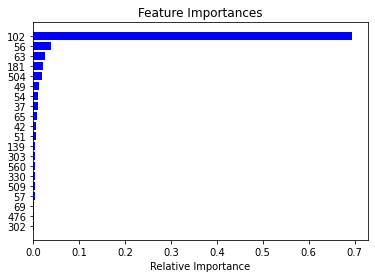

In [106]:
features=data.columns
importances=model1.feature_importances_
indices = np.argsort(importances)[-20:]  # top 80 features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()
selected_features=[features[i] for i in indices]

In [108]:
data_after_RF=data[selected_features]

In [109]:
data_after_RF

,302,476,69,57,509,330,560,303,139,51,42,65,37,54,49,504,181,63,56,102
0,-0.812300,-0.79845,0.183860,-0.98223,-0.357970,-0.59567,0.155710,-0.67741,0.043679,-0.170100,-0.185710,-0.28371,0.060380,-0.196020,0.85742,-0.24683,-0.34622,-0.192380,0.75438,0.66965
1,-0.859070,-0.89067,-0.317770,-0.93661,-0.360600,-0.76223,0.046078,-0.85571,-0.492890,-0.006883,-0.031985,-0.62215,-0.142340,-0.050869,0.79233,-0.26603,-0.57348,-1.000000,0.60876,0.53391
2,-0.779560,-0.97099,-0.676350,-0.99624,-0.498650,-0.61913,0.063412,-0.94452,-0.396320,-0.050900,-0.055481,-0.64045,0.175420,-0.065852,0.83856,-0.38402,-0.65520,-0.966820,0.68541,0.74086
3,-0.999950,-0.99989,-0.275170,-0.98303,-0.984400,-0.99924,-0.008889,-0.99994,-0.967240,0.040792,0.041905,-0.29605,0.202020,0.037238,0.81959,-0.97698,-0.98761,-1.000000,0.71984,-0.60071
4,-0.908560,-0.99994,-0.943640,-0.97048,-0.867150,-0.99979,0.024504,-0.99151,-0.959710,-0.006231,-0.003264,-1.00400,-0.766310,-0.003740,0.92372,-0.58337,-0.99146,-1.000000,0.66802,-0.62306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4247,-0.999680,-0.99989,-0.324440,-0.36750,-0.973970,-0.99957,-0.615220,-0.99971,-0.990710,0.731970,0.742610,-0.38181,0.087882,0.740840,-0.22874,-0.97070,-0.99403,-1.000000,-0.91100,-0.43793
4248,-0.080192,-0.94526,-0.295270,-0.99872,0.075548,-0.36811,0.174130,-0.91368,-0.434570,0.005599,-0.112690,-0.88804,-0.373220,-0.273200,0.94308,0.56609,-0.83534,-0.493930,-0.20025,0.26091
4249,-0.961840,-0.99159,-0.605760,-0.95529,-0.598010,-0.75308,0.348640,-0.90054,-0.419870,-0.428130,-0.443980,-0.36786,0.294750,-0.461840,0.72774,-0.56634,-0.66900,0.228160,0.46553,0.51279
4250,-0.993120,-0.99833,-0.666740,-0.99603,-0.823690,-0.97822,0.179510,-0.99067,-0.908980,-0.220640,-0.222060,-0.55032,-0.246870,-0.238240,0.85393,-0.79750,-0.96242,0.086704,0.80464,-0.04497


In [110]:
labels

0       1
1       2
2       2
3       5
4       5
       ..
4247    6
4248    1
4249    2
4250    5
4251    1
Name: class, Length: 4252, dtype: int64

<h1 > Halt and Stop </h1>
<h2> PCA Code </h2>

In [65]:
from sklearn.decomposition import PCA
pca_1 = PCA(n_components=20)
principalComponents = pca_1.fit_transform(X_train)
data_after_RF=pd.DataFrame(principalComponents)
data_after_RF

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,17.629531,14.856823,10.593409,-3.781079,-0.230631,-2.629830,2.825996,-8.828905,-3.269102,-6.578480,2.159592,1.837202,-1.987490,1.322127,2.970779,-3.654699,2.091649,-3.082109,0.733009,-0.820087
1,8.315133,4.921955,-3.995595,-2.255632,-0.461161,0.916194,1.667741,-3.197429,1.044379,0.097800,0.168932,-0.695841,-1.567962,0.494077,-0.723823,-0.442762,1.914127,2.452142,2.941270,-0.875028
2,5.155627,2.154239,-5.819888,-1.102799,0.287754,1.054957,-0.567482,-2.257072,-1.038818,-1.656368,-0.147627,-0.803911,-0.978908,-1.965637,-0.601632,-1.967115,-2.640024,2.022526,2.801107,-0.959965
3,3.103288,3.767917,-6.018159,-1.677049,1.064371,0.691963,-1.510585,-1.111558,-1.349424,-2.358492,0.466362,-1.070167,0.433423,-2.167386,-0.530678,-2.469406,-3.085323,-0.314081,0.525884,-0.751699
4,1.893014,6.439557,-5.857893,-1.931942,0.319152,-0.173189,-0.837526,-1.445935,0.938064,-0.741610,-1.252487,0.630344,-1.756081,-1.811645,0.272141,-1.653960,-1.236539,-0.055979,0.671251,-2.306505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4247,-15.346321,-5.223540,2.066638,-0.071040,-2.737702,2.245572,-2.540565,-2.358935,-0.237690,-1.986813,1.721676,0.451884,0.742498,-0.463987,4.093653,4.451495,-1.226662,-5.124464,2.369892,2.796131
4248,-15.632898,-7.127824,2.817008,0.017201,-2.730833,2.092721,-3.115867,-3.415086,-1.001908,-2.261312,1.836727,0.698259,0.570752,-0.425441,4.355570,5.076866,-2.319139,-4.613177,3.123821,1.958682
4249,-17.016423,-9.349355,5.325734,1.912351,-1.780125,1.598338,-3.942679,-2.457444,-1.664441,1.860920,0.076592,1.036340,-5.423483,-1.701017,4.847681,2.904304,-1.793181,-3.872349,1.418040,0.675944
4250,-17.054935,-8.611769,3.950561,1.225732,0.202216,2.609193,-3.498617,-0.149453,-2.515303,-0.557511,1.498262,0.026294,-3.384069,-3.548249,3.816402,2.331627,-2.298082,-3.585890,-0.505159,1.327229


<h2> PCA STOP </h2>

In [112]:
# Defining Splitter for the dataset (Common for all)
def splitter(len_array,lower_bound, incrementor, start_idx):
    final=0
    per=[]
    sp=[start_idx]
    for i in range(lower_bound,100,incrementor):
        if final+i>100:
            break
        per.append(i)
        final+=i
    for i in per:
        len_of_data=round((i/100)*len_array)
        sp.append(sp[-1]+len_of_data)
    return per,sp

lower_bound=5
incrementor=5
start_idx=0

        
spliting_percentage, spliting_position=splitter(len(data),lower_bound,incrementor,start_idx)
print("Splitting Percentages are: {}".format(spliting_percentage))
print("Splitting Position are: {}".format(spliting_position))

Splitting Percentages are: [5, 10, 15, 20, 25]
Splitting Position are: [0, 213, 638, 1276, 2126, 3189]


In [113]:
data_for_experiment=data_after_RF.copy(deep=True)
labels_for_experiment=labels.copy(deep=True)

In [114]:
data_after_RF

,302,476,69,57,509,330,560,303,139,51,42,65,37,54,49,504,181,63,56,102
0,-0.812300,-0.79845,0.183860,-0.98223,-0.357970,-0.59567,0.155710,-0.67741,0.043679,-0.170100,-0.185710,-0.28371,0.060380,-0.196020,0.85742,-0.24683,-0.34622,-0.192380,0.75438,0.66965
1,-0.859070,-0.89067,-0.317770,-0.93661,-0.360600,-0.76223,0.046078,-0.85571,-0.492890,-0.006883,-0.031985,-0.62215,-0.142340,-0.050869,0.79233,-0.26603,-0.57348,-1.000000,0.60876,0.53391
2,-0.779560,-0.97099,-0.676350,-0.99624,-0.498650,-0.61913,0.063412,-0.94452,-0.396320,-0.050900,-0.055481,-0.64045,0.175420,-0.065852,0.83856,-0.38402,-0.65520,-0.966820,0.68541,0.74086
3,-0.999950,-0.99989,-0.275170,-0.98303,-0.984400,-0.99924,-0.008889,-0.99994,-0.967240,0.040792,0.041905,-0.29605,0.202020,0.037238,0.81959,-0.97698,-0.98761,-1.000000,0.71984,-0.60071
4,-0.908560,-0.99994,-0.943640,-0.97048,-0.867150,-0.99979,0.024504,-0.99151,-0.959710,-0.006231,-0.003264,-1.00400,-0.766310,-0.003740,0.92372,-0.58337,-0.99146,-1.000000,0.66802,-0.62306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4247,-0.999680,-0.99989,-0.324440,-0.36750,-0.973970,-0.99957,-0.615220,-0.99971,-0.990710,0.731970,0.742610,-0.38181,0.087882,0.740840,-0.22874,-0.97070,-0.99403,-1.000000,-0.91100,-0.43793
4248,-0.080192,-0.94526,-0.295270,-0.99872,0.075548,-0.36811,0.174130,-0.91368,-0.434570,0.005599,-0.112690,-0.88804,-0.373220,-0.273200,0.94308,0.56609,-0.83534,-0.493930,-0.20025,0.26091
4249,-0.961840,-0.99159,-0.605760,-0.95529,-0.598010,-0.75308,0.348640,-0.90054,-0.419870,-0.428130,-0.443980,-0.36786,0.294750,-0.461840,0.72774,-0.56634,-0.66900,0.228160,0.46553,0.51279
4250,-0.993120,-0.99833,-0.666740,-0.99603,-0.823690,-0.97822,0.179510,-0.99067,-0.908980,-0.220640,-0.222060,-0.55032,-0.246870,-0.238240,0.85393,-0.79750,-0.96242,0.086704,0.80464,-0.04497


In [115]:
labels_for_experiment

0       1
1       2
2       2
3       5
4       5
       ..
4247    6
4248    1
4249    2
4250    5
4251    1
Name: class, Length: 4252, dtype: int64

# Apply ML Algorithms

In [119]:
# SImple Algorithm
# splitting dataset into training and testing part
test_data_ratio=[0.2]
for i in test_data_ratio:
    print("******************Start of iteration******************\n")
    print("For ratio ",i)
    X_train, X_test, y_train, y_test=train_test_split(data_after_RF,labels,test_size=i,shuffle=True)
    model = LogisticRegression(max_iter=1000)
    solvers = ["lbfgs","liblinear"]
    penalty = ['l2']
    c_values = [5]
    # define grid search
    grid = dict(solver=solvers,penalty=penalty,C=c_values)
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=42)
    grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='f1',error_score=0,)
    grid_result = grid_search.fit(X_train, y_train)
    # summarize results
    print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
    means = grid_result.cv_results_['mean_test_score']
    stds = grid_result.cv_results_['std_test_score']
    params = grid_result.cv_results_['params']
    
    #Predict the response for test dataset
    y_pred = grid_search.predict(X_test)
    print(confusion_matrix(y_test,y_pred))
    print("\n")
    print(classification_report(y_test,y_pred))
#     print("Training set score for logreg_model: %f" % grid_search.score(X_train , y_train))
#     print("Testing  set score for logreg_model: %f" % grid_search.score(X_test  , y_test ))

    print("******************End of iteration******************\n")

******************Start of iteration******************

For ratio  0.2
Best: 0.000000 using {'C': 5, 'penalty': 'l2', 'solver': 'lbfgs'}
[[140  13  19   0   0   0]
 [ 12  87  16   1   0   6]
 [ 17  15  97   0   0   0]
 [  1   1   0 112  48   9]
 [  1   1   0  36 113   0]
 [  0   5   0   0   0 101]]


              precision    recall  f1-score   support

           1       0.82      0.81      0.82       172
           2       0.71      0.71      0.71       122
           3       0.73      0.75      0.74       129
           4       0.75      0.65      0.70       171
           5       0.70      0.75      0.72       151
           6       0.87      0.95      0.91       106

    accuracy                           0.76       851
   macro avg       0.77      0.77      0.77       851
weighted avg       0.76      0.76      0.76       851

******************End of iteration******************



In [120]:
for i in range(len(spliting_position)-1):
    print("******************Start of iteration******************")
    print("Splitting percentage is {}".format(spliting_percentage[i]))
    
    X_train=pd.DataFrame(data_for_experiment.iloc[spliting_position[i]:spliting_position[i+1],:])
    Y_train=labels_for_experiment.iloc[spliting_position[i]:spliting_position[i+1]]
    X_test=data_for_experiment.drop(X_train.index, axis=0).sample(len(X_train))
    Y_test=np.array(pd.DataFrame(labels_for_experiment,index=X_test.index))
    
    print("Shape of training input X_train: {}".format(X_train.shape))
    print("Shape of testing input X_test: {}".format(X_test.shape))
    print("Shape of training output Y_train: {}".format(Y_train.shape))
    print("Shape of testing output Y_test: {}".format(Y_test.shape))

    model = LogisticRegression(max_iter=1000)
    solvers = ["lbfgs","liblinear"]
    penalty = ['l2','l1']
    c_values = [10]
    # define grid search
    grid = dict(solver=solvers,penalty=penalty,C=c_values)
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=42)
    grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=2, cv=cv, scoring='f1',error_score=0,)
    grid_result = grid_search.fit(X_train, Y_train)
    # summarize results
    print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
    means = grid_result.cv_results_['mean_test_score']
    stds = grid_result.cv_results_['std_test_score']
    params = grid_result.cv_results_['params']
    
    #Predict the response for test dataset
    Y_pred = grid_search.predict(X_test)
    print(confusion_matrix(Y_test,Y_pred))
    print("\n")
    print(classification_report(Y_test,Y_pred))

    print("******************End of iteration******************\n")

******************Start of iteration******************
Splitting percentage is 5
Shape of training input X_train: (213, 20)
Shape of testing input X_test: (213, 20)
Shape of training output Y_train: (213,)
Shape of testing output Y_test: (213, 1)
Best: 0.000000 using {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
[[26  8  2  0  0  0]
 [ 4 25  0  0  0  1]
 [ 7  6 26  0  0  0]
 [ 0  1  0 21  8  2]
 [ 0  0  0  6 45  0]
 [ 0  1  0  0  0 24]]


              precision    recall  f1-score   support

           1       0.70      0.72      0.71        36
           2       0.61      0.83      0.70        30
           3       0.93      0.67      0.78        39
           4       0.78      0.66      0.71        32
           5       0.85      0.88      0.87        51
           6       0.89      0.96      0.92        25

    accuracy                           0.78       213
   macro avg       0.79      0.79      0.78       213
weighted avg       0.80      0.78      0.78       213

**************

# ****KNN Classifer ****

In [121]:
# splitting dataset into training and testing part
test_data_ratio=[0.2]
for i in test_data_ratio:
    print("******************Start of iteration******************\n")
    print("For ratio ",i)
    X_train, X_test, y_train, y_test=train_test_split(data_after_RF,labels,test_size=i,shuffle=True)
    model = KNeighborsClassifier()
    params_grid = [{'n_neighbors': [2,3,4], 'weights' :['uniform'],'leaf_size':[4,5,6,7,8,9],'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']}]
    knn_model = GridSearchCV(model, params_grid, cv=5)
    knn_model.fit(X_train,y_train)
    print('Best score for training data:', knn_model.best_score_,"\n") 

    # View the best parameters for the model found using grid search
    print('Best #neighbors:',knn_model.best_estimator_.n_neighbors,"\n") 
    print('Best weights:',knn_model.best_estimator_.weights,"\n")
    print('Best leaf_size:',knn_model.best_estimator_.leaf_size,"\n")
    print('Best algorithm:',knn_model.best_estimator_.algorithm,"\n")
    final_model = knn_model.best_estimator_

    
    #Predict the response for test dataset
    y_pred = final_model.predict(X_test)
    print(confusion_matrix(y_test,y_pred))
    print("\n")
    print(classification_report(y_test,y_pred))
    print("Training set score for knn_model: %f" % final_model.score(X_train , y_train))
    print("Testing  set score for knn_model: %f" % final_model.score(X_test  , y_test ))

    print("******************End of iteration******************\n")

******************Start of iteration******************

For ratio  0.2
Best score for training data: 0.8765042757190983 

Best #neighbors: 3 

Best weights: uniform 

Best leaf_size: 4 

Best algorithm: auto 

[[155   6   7   0   0   0]
 [  8 112   4   0   0   0]
 [  7   6 128   0   0   0]
 [  0   2   2 121  29   3]
 [  1   1   2  16 127   0]
 [  0   2   0   2   0 110]]


              precision    recall  f1-score   support

           1       0.91      0.92      0.91       168
           2       0.87      0.90      0.89       124
           3       0.90      0.91      0.90       141
           4       0.87      0.77      0.82       157
           5       0.81      0.86      0.84       147
           6       0.97      0.96      0.97       114

    accuracy                           0.88       851
   macro avg       0.89      0.89      0.89       851
weighted avg       0.89      0.88      0.88       851

Training set score for knn_model: 0.939724
Testing  set score for knn_model: 0.884

In [122]:
# splitting dataset into training and testing part
for i in range(len(spliting_position)-1):
    print("******************Start of iteration******************")
    print("Splitting percentage is {}".format(spliting_percentage[i]))
    
    X_train=pd.DataFrame(data_for_experiment.iloc[spliting_position[i]:spliting_position[i+1],:])
    Y_train=labels_for_experiment.iloc[spliting_position[i]:spliting_position[i+1]]
    X_test=data_for_experiment.drop(X_train.index, axis=0).sample(len(X_train))
    Y_test=np.array(pd.DataFrame(labels_for_experiment,index=X_test.index))
    
    print("Shape of training input X_train: {}".format(X_train.shape))
    print("Shape of testing input X_test: {}".format(X_test.shape))
    print("Shape of training output Y_train: {}".format(Y_train.shape))
    print("Shape of testing output Y_test: {}".format(Y_test.shape))
    model = KNeighborsClassifier()
    params_grid = [{'n_neighbors': [2,3,4], 'weights' :['uniform'],'leaf_size':[4,5,6,7,8,9],'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']}]
    knn_model = GridSearchCV(model, params_grid, cv=5)
    knn_model.fit(X_train,Y_train)
    print('Best score for training data:', knn_model.best_score_,"\n") 

    # View the best parameters for the model found using grid search
    print('Best #neighbors:',knn_model.best_estimator_.n_neighbors,"\n") 
    print('Best weights:',knn_model.best_estimator_.weights,"\n")
    print('Best leaf_size:',knn_model.best_estimator_.leaf_size,"\n")
    print('Best algorithm:',knn_model.best_estimator_.algorithm,"\n")
    final_model = knn_model.best_estimator_

    
    #Predict the response for test dataset
    Y_pred = final_model.predict(X_test)
    print(confusion_matrix(Y_test,Y_pred))
    print("\n")
    print(classification_report(y_test,y_pred))
    print("Training set score for knn_model: %f" % final_model.score(X_train , Y_train))
    print("Testing  set score for knn_model: %f" % final_model.score(X_test  , Y_test ))

    print("******************End of iteration******************\n")

******************Start of iteration******************
Splitting percentage is 5
Shape of training input X_train: (213, 20)
Shape of testing input X_test: (213, 20)
Shape of training output Y_train: (213,)
Shape of testing output Y_test: (213, 1)
Best score for training data: 0.7132890365448505 

Best #neighbors: 3 

Best weights: uniform 

Best leaf_size: 4 

Best algorithm: auto 

[[29  1  3  0  0  0]
 [ 7 24  5  0  0  0]
 [ 6  4 21  0  0  0]
 [ 0  2  0 37 11  0]
 [ 2  0  0  8 32  0]
 [ 0  3  0  0  0 18]]


              precision    recall  f1-score   support

           1       0.91      0.92      0.91       168
           2       0.87      0.90      0.89       124
           3       0.90      0.91      0.90       141
           4       0.87      0.77      0.82       157
           5       0.81      0.86      0.84       147
           6       0.97      0.96      0.97       114

    accuracy                           0.88       851
   macro avg       0.89      0.89      0.89       8

# ** Support Vector Machine **

In [123]:
# splitting dataset into training and testing part


test_data_ratio=[0.2]
for i in test_data_ratio:
    print("******************Start of iteration******************\n")
    print("For ratio ",i)
    X_train, X_test, y_train, y_test=train_test_split(data_after_RF,labels,test_size=i,shuffle=True)
    model = SVC()
    params_grid = [{'kernel': ['linear'], 'C': [2]}]
    svm_model = GridSearchCV(model, params_grid, cv=3)
    svm_model.fit(X_train,y_train)
    print('Best score for training data:', svm_model.best_score_,"\n") 

    # View the best parameters for the model found using grid search
    print('Best C:',svm_model.best_estimator_.C,"\n") 
    print('Best Kernel:',svm_model.best_estimator_.kernel,"\n")
    print('Best Gamma:',svm_model.best_estimator_.gamma,"\n")
    final_model = svm_model.best_estimator_

    
    #Predict the response for test dataset
    y_pred = final_model.predict(X_test)
    print(confusion_matrix(y_test,y_pred))
    print("\n")
    print(classification_report(y_test,y_pred))
    print("Training set score for svm_model: %f" % final_model.score(X_train , y_train))
    print("Testing  set score for svm_model: %f" % final_model.score(X_test  , y_test ))

    print("******************End of iteration******************\n")

******************Start of iteration******************

For ratio  0.2
Best score for training data: 0.7785934549688595 

Best C: 2 

Best Kernel: linear 

Best Gamma: scale 

[[150   8  19   0   0   0]
 [ 29  94  12   2   0   2]
 [ 21  11 111   0   1   0]
 [  0   1   0  79  63   5]
 [  0   1   0  23 122   0]
 [  0   3   0   1   0  93]]


              precision    recall  f1-score   support

           1       0.75      0.85      0.80       177
           2       0.80      0.68      0.73       139
           3       0.78      0.77      0.78       144
           4       0.75      0.53      0.62       148
           5       0.66      0.84      0.73       146
           6       0.93      0.96      0.94        97

    accuracy                           0.76       851
   macro avg       0.78      0.77      0.77       851
weighted avg       0.77      0.76      0.76       851

Training set score for svm_model: 0.794472
Testing  set score for svm_model: 0.762632
******************End of itera

In [125]:
# splitting dataset into training and testing part

for i in range(len(spliting_position)-1):
    print("******************Start of iteration******************")
    print("Splitting percentage is {}".format(spliting_percentage[i]))
    
    X_train=pd.DataFrame(data_for_experiment.iloc[spliting_position[i]:spliting_position[i+1],:])
    y_train=labels_for_experiment.iloc[spliting_position[i]:spliting_position[i+1]]
    X_test=data_for_experiment.drop(X_train.index, axis=0).sample(len(X_train))
    y_test=np.array(pd.DataFrame(labels_for_experiment,index=X_test.index))
    
    print("Shape of training input X_train: {}".format(X_train.shape))
    print("Shape of testing input X_test: {}".format(X_test.shape))
    print("Shape of training output Y_train: {}".format(Y_train.shape))
    print("Shape of testing output Y_test: {}".format(Y_test.shape))
    
    model = SVC()
    params_grid = [{'kernel': ['linear'], 'C': [100,150]}]
    svm_model = GridSearchCV(model, params_grid, cv=3)
    svm_model.fit(X_train,y_train)
    print('Best score for training data:', svm_model.best_score_,"\n") 

    # View the best parameters for the model found using grid search
    print('Best C:',svm_model.best_estimator_.C,"\n") 
    print('Best Kernel:',svm_model.best_estimator_.kernel,"\n")
    print('Best Gamma:',svm_model.best_estimator_.gamma,"\n")
    final_model = svm_model.best_estimator_

    
    #Predict the response for test dataset
    y_pred = final_model.predict(X_test)
    print(confusion_matrix(y_test,y_pred))
    print("\n")
    print(classification_report(y_test,y_pred))
    print("Training set score for svm_model: %f" % final_model.score(X_train , y_train))
    print("Testing  set score for svm_model: %f" % final_model.score(X_test  , y_test ))

    print("******************End of iteration******************\n")

******************Start of iteration******************
Splitting percentage is 5
Shape of training input X_train: (213, 20)
Shape of testing input X_test: (213, 20)
Shape of training output Y_train: (213,)
Shape of testing output Y_test: (213, 1)
Best score for training data: 0.6713615023474179 

Best C: 100 

Best Kernel: linear 

Best Gamma: scale 

[[32  6  0  0  0  0]
 [ 3 15  5  0  0  0]
 [ 8  5 30  0  0  0]
 [ 0  0  0 20 18  2]
 [ 0  0  0  3 35  0]
 [ 0  3  0  0  0 28]]


              precision    recall  f1-score   support

           1       0.74      0.84      0.79        38
           2       0.52      0.65      0.58        23
           3       0.86      0.70      0.77        43
           4       0.87      0.50      0.63        40
           5       0.66      0.92      0.77        38
           6       0.93      0.90      0.92        31

    accuracy                           0.75       213
   macro avg       0.76      0.75      0.74       213
weighted avg       0.78      

# ** Decision Tree **

In [126]:
# splitting dataset into training and testing part

test_data_ratio=[0.2]
for i in test_data_ratio:
    print("******************Start of iteration******************\n")
    print("For ratio ",i)
    X_train, X_test, y_train, y_test=train_test_split(data_after_RF,labels,test_size=i,shuffle=True)
    model = DecisionTreeClassifier()
    params_grid = [{'max_depth': [8,9,10,11,12],'random_state':[42]}]
    dc_model = GridSearchCV(model, params_grid, cv=3)
    dc_model.fit(X_train,y_train)
    print('Best score for training data:', dc_model.best_score_,"\n") 

    # View the best parameters for the model found using grid search
    print('Best depth:',dc_model.best_estimator_.max_depth,"\n") 
    print('Best #features:',dc_model.best_estimator_.max_features,"\n")
    #print('Best Gamma:',dc_model.best_estimator_.,"\n")
    final_model = dc_model.best_estimator_

    
    #Predict the response for test dataset
    y_pred = final_model.predict(X_test)
    print(confusion_matrix(y_test,y_pred))
    print("\n")
    print(classification_report(y_test,y_pred))
    print("Training set score for dc_model: %f" % final_model.score(X_train , y_train))
    print("Testing  set score for dc_model: %f" % final_model.score(X_test  , y_test ))

    print("******************End of iteration******************\n")

******************Start of iteration******************

For ratio  0.2
Best score for training data: 0.8462191649893915 

Best depth: 11 

Best #features: None 

[[153   6   9   0   0   0]
 [ 10  94   8   0   0   0]
 [ 10  14 114   1   0   1]
 [  0   0   0 153  14   1]
 [  1   0   0   9 145   0]
 [  0   2   1   0   0 105]]


              precision    recall  f1-score   support

           1       0.88      0.91      0.89       168
           2       0.81      0.84      0.82       112
           3       0.86      0.81      0.84       140
           4       0.94      0.91      0.92       168
           5       0.91      0.94      0.92       155
           6       0.98      0.97      0.98       108

    accuracy                           0.90       851
   macro avg       0.90      0.90      0.90       851
weighted avg       0.90      0.90      0.90       851

Training set score for dc_model: 0.982358
Testing  set score for dc_model: 0.897767
******************End of iteration************

In [127]:
# splitting dataset into training and testing part

for i in range(len(spliting_position)-1):
    print("******************Start of iteration******************")
    print("Splitting percentage is {}".format(spliting_percentage[i]))
    
    X_train=pd.DataFrame(data_for_experiment.iloc[spliting_position[i]:spliting_position[i+1],:])
    Y_train=labels_for_experiment.iloc[spliting_position[i]:spliting_position[i+1]]
    X_test=data_for_experiment.drop(X_train.index, axis=0).sample(len(X_train))
    Y_test=np.array(pd.DataFrame(labels_for_experiment,index=X_test.index))
    
    print("Shape of training input X_train: {}".format(X_train.shape))
    print("Shape of testing input X_test: {}".format(X_test.shape))
    print("Shape of training output Y_train: {}".format(Y_train.shape))
    print("Shape of testing output Y_test: {}".format(Y_test.shape))
    
    model = DecisionTreeClassifier()
    params_grid = [{'max_depth': [8,9,10,11,12],'random_state':[42]}]
    dc_model = GridSearchCV(model, params_grid, cv=3)
    dc_model.fit(X_train,Y_train)
    print('Best score for training data:', dc_model.best_score_,"\n") 

    # View the best parameters for the model found using grid search
    print('Best depth:',dc_model.best_estimator_.max_depth,"\n") 
    print('Best #features:',dc_model.best_estimator_.max_features,"\n")
    #print('Best Gamma:',dc_model.best_estimator_.,"\n")
    final_model = dc_model.best_estimator_

    
    #Predict the response for test dataset
    Y_pred = final_model.predict(X_test)
    print(confusion_matrix(Y_test,Y_pred))
    print("\n")
    print(classification_report(Y_test,Y_pred))
    print("Training set score for dc_model: %f" % final_model.score(X_train , Y_train))
    print("Testing  set score for dc_model: %f" % final_model.score(X_test  , Y_test ))

    print("******************End of iteration******************\n")

******************Start of iteration******************
Splitting percentage is 5
Shape of training input X_train: (213, 20)
Shape of testing input X_test: (213, 20)
Shape of training output Y_train: (213,)
Shape of testing output Y_test: (213, 1)
Best score for training data: 0.7230046948356806 

Best depth: 8 

Best #features: None 

[[19  6  3  0  0  0]
 [ 3 16  5  0  0  1]
 [ 7 16 24  0  0  0]
 [ 0  0  0 29  8  1]
 [ 1  0  0 14 32  0]
 [ 0  6  0  1  0 21]]


              precision    recall  f1-score   support

           1       0.63      0.68      0.66        28
           2       0.36      0.64      0.46        25
           3       0.75      0.51      0.61        47
           4       0.66      0.76      0.71        38
           5       0.80      0.68      0.74        47
           6       0.91      0.75      0.82        28

    accuracy                           0.66       213
   macro avg       0.69      0.67      0.67       213
weighted avg       0.71      0.66      0.67   

<h1> **************************************************************************************************************</h1>

 <h1> AdaBoost </h1>


In [128]:
# splitting dataset into training and testing part

test_data_ratio=[0.3,0.25,0.2,0.15,0.1,0.05]
for i in test_data_ratio:
    print("******************Start of iteration******************\n")
    print("For ratio ",i)
    X_train, X_test, y_train, y_test=train_test_split(data_after_RF,labels,test_size=i,shuffle=True)
    model = DecisionTreeClassifier(max_features=None)
    params_grid = [{'n_estimators':[2,4],'learning_rate':[1.0,1e-1,1e-2],'algorithm':['SAMME.R','SAMME']}]
    model_ada=AdaBoostClassifier(model,)
    dc_model = GridSearchCV(model_ada, params_grid, cv=3)
    dc_model.fit(X_train,y_train)
    print('Best score for training data:', dc_model.best_score_,"\n") 

    # View the best parameters for the model found using grid search
    print('Best estimator:',dc_model.best_estimator_.n_estimators,"\n") 
    print('Best #learning rate:',dc_model.best_estimator_.learning_rate,"\n")
    print('Best algorithm:',dc_model.best_estimator_.algorithm,"\n")
    final_model = dc_model.best_estimator_

    
    #Predict the response for test dataset
    y_pred = final_model.predict(X_test)
    print(confusion_matrix(y_test,y_pred))
    print("\n")
    print(classification_report(y_test,y_pred))
    print("Training set score for dc_model: %f" % final_model.score(X_train , y_train))
    print("Testing  set score for dc_model: %f" % final_model.score(X_test  , y_test ))

    print("******************End of iteration******************\n")

******************Start of iteration******************

For ratio  0.3
Best score for training data: 0.8316532258064516 

Best estimator: 2 

Best #learning rate: 1.0 

Best algorithm: SAMME.R 

[[186  12  16   0   0   0]
 [ 21 148  22   0   0   2]
 [ 26  19 170   0   0   2]
 [  1   2   1 207  38   2]
 [  3   0   0  13 205   1]
 [  0   0   0   6   1 172]]


              precision    recall  f1-score   support

           1       0.78      0.87      0.82       214
           2       0.82      0.77      0.79       193
           3       0.81      0.78      0.80       217
           4       0.92      0.82      0.87       251
           5       0.84      0.92      0.88       222
           6       0.96      0.96      0.96       179

    accuracy                           0.85      1276
   macro avg       0.86      0.85      0.85      1276
weighted avg       0.85      0.85      0.85      1276

Training set score for dc_model: 1.000000
Testing  set score for dc_model: 0.852665
*************

In [129]:
# splitting dataset into training and testing part


for i in range(len(spliting_position)-1):
    print("******************Start of iteration******************")
    print("Splitting percentage is {}".format(spliting_percentage[i]))
    
    X_train=pd.DataFrame(data_for_experiment.iloc[spliting_position[i]:spliting_position[i+1],:])
    y_train=labels_for_experiment.iloc[spliting_position[i]:spliting_position[i+1]]
    X_test=data_for_experiment.drop(X_train.index, axis=0).sample(len(X_train))
    y_test=np.array(pd.DataFrame(labels_for_experiment,index=X_test.index))
    
    print("Shape of training input X_train: {}".format(X_train.shape))
    print("Shape of testing input X_test: {}".format(X_test.shape))
    print("Shape of training output Y_train: {}".format(Y_train.shape))
    print("Shape of testing output Y_test: {}".format(Y_test.shape))
    
    model = DecisionTreeClassifier(max_features=None)
    params_grid = [{'n_estimators':[2,4],'learning_rate':[1.0,1e-1,1e-2],'algorithm':['SAMME.R','SAMME']}]
    model_ada=AdaBoostClassifier(model,)
    dc_model = GridSearchCV(model_ada, params_grid, cv=3)
    dc_model.fit(X_train,y_train)
    print('Best score for training data:', dc_model.best_score_,"\n") 

    # View the best parameters for the model found using grid search
    print('Best estimator:',dc_model.best_estimator_.n_estimators,"\n") 
    print('Best #learning rate:',dc_model.best_estimator_.learning_rate,"\n")
    print('Best algorithm:',dc_model.best_estimator_.algorithm,"\n")
    final_model = dc_model.best_estimator_

    
    #Predict the response for test dataset
    y_pred = final_model.predict(X_test)
    print(confusion_matrix(y_test,y_pred))
    print("\n")
    print(classification_report(y_test,y_pred))
    print("Training set score for dc_model: %f" % final_model.score(X_train , y_train))
    print("Testing  set score for dc_model: %f" % final_model.score(X_test  , y_test ))

    print("******************End of iteration******************\n")

******************Start of iteration******************
Splitting percentage is 5
Shape of training input X_train: (213, 20)
Shape of testing input X_test: (213, 20)
Shape of training output Y_train: (1063,)
Shape of testing output Y_test: (1063, 1)
Best score for training data: 0.7417840375586855 

Best estimator: 2 

Best #learning rate: 1.0 

Best algorithm: SAMME 

[[27  9  8  0  0  0]
 [ 2 23  8  1  0  1]
 [ 5  9 20  0  0  0]
 [ 0  0  0 32  8  1]
 [ 0  1  0  6 30  0]
 [ 0  3  0  0  0 19]]


              precision    recall  f1-score   support

           1       0.79      0.61      0.69        44
           2       0.51      0.66      0.57        35
           3       0.56      0.59      0.57        34
           4       0.82      0.78      0.80        41
           5       0.79      0.81      0.80        37
           6       0.90      0.86      0.88        22

    accuracy                           0.71       213
   macro avg       0.73      0.72      0.72       213
weighted avg

# ** Ensemble Learning **

In [130]:
test_data_ratio=[0.20]
for i in test_data_ratio:
    print("******************Start of iteration******************\n")
    print("For ratio ",i)
    X_train, X_test, y_train, y_test=train_test_split(data_after_RF,labels,test_size=i,shuffle=True)
    estimator = []
    # make different combination in the ensemble classfier
    estimator.append(('lr',LogisticRegression(solver='saga',penalty='l1',C=1,n_jobs=2)))
    estimator.append(('SVC', SVC(gamma ='scale',probability=True,C=100,kernel='linear',)))
    base_estimator=DecisionTreeClassifier(max_depth=14,criterion='gini', splitter='best', min_samples_split=17,random_state=42)
    model = AdaBoostClassifier(base_estimator=base_estimator,n_estimators=250 ,learning_rate=1,algorithm='SAMME',random_state=7)
    estimator.append(('DTC', model))
    #estimator.append(('svc_rbf',SVC(gamma ='auto',C=4,kernel='rbf',)))


    vot_hard = VotingClassifier(estimators = estimator, voting ='soft')
    vot_hard.fit(X_train,y_train)
    Y_pred = vot_hard.predict(X_test)
    
    print(confusion_matrix(y_test,Y_pred))
    print(classification_report(y_test,Y_pred))
    print("Training set score for EL: %f" % vot_hard.score(X_train , y_train))
    print("Testing  set score for EL: %f" % vot_hard.score(X_test  , y_test ))
    

    score = accuracy_score(y_test, Y_pred)
    print("Hard Voting Score % d" % score)
    

    print("******************End of iteration******************\n")

******************Start of iteration******************

For ratio  0.2
[[134  11  14   0   0   0]
 [ 15  81  14   1   1   3]
 [ 18  12  92   0   0   0]
 [  0   3   0 121  56   2]
 [  3   1   2  24 140   0]
 [  0   2   0   0   0 101]]
              precision    recall  f1-score   support

           1       0.79      0.84      0.81       159
           2       0.74      0.70      0.72       115
           3       0.75      0.75      0.75       122
           4       0.83      0.66      0.74       182
           5       0.71      0.82      0.76       170
           6       0.95      0.98      0.97       103

    accuracy                           0.79       851
   macro avg       0.80      0.80      0.79       851
weighted avg       0.79      0.79      0.78       851

Training set score for EL: 0.790650
Testing  set score for EL: 0.786134
Hard Voting Score  0
******************End of iteration******************



In [131]:

for i in range(len(spliting_position)-1):
    print("******************Start of iteration******************")
    print("Splitting percentage is {}".format(spliting_percentage[i]))
    
    X_train=pd.DataFrame(data_for_experiment.iloc[spliting_position[i]:spliting_position[i+1],:])
    Y_train=labels_for_experiment.iloc[spliting_position[i]:spliting_position[i+1]]
    X_test=data_for_experiment.drop(X_train.index, axis=0).sample(len(X_train))
    Y_test=np.array(pd.DataFrame(labels_for_experiment,index=X_test.index))
    
    print("Shape of training input X_train: {}".format(X_train.shape))
    print("Shape of testing input X_test: {}".format(X_test.shape))
    print("Shape of training output Y_train: {}".format(Y_train.shape))
    print("Shape of testing output Y_test: {}".format(Y_test.shape))
    
    estimator = []
    # make different combination in the ensemble classfier
    estimator.append(('lr',LogisticRegression(solver='saga',penalty='l1',C=1,n_jobs=2)))
    estimator.append(('SVC', SVC(gamma ='scale',probability=True,C=100,kernel='linear',)))
    base_estimator=DecisionTreeClassifier(max_depth=14,criterion='gini', splitter='best', min_samples_split=17,random_state=42)
    model = AdaBoostClassifier(base_estimator=base_estimator,n_estimators=250 ,learning_rate=1,algorithm='SAMME',random_state=7)
    estimator.append(('DTC', model))
    #estimator.append(('svc_rbf',SVC(gamma ='auto',C=4,kernel='rbf',)))


    vot_hard = VotingClassifier(estimators = estimator, voting ='soft')
    vot_hard.fit(X_train,Y_train)
    Y_pred = vot_hard.predict(X_test)
    
    print(confusion_matrix(Y_test,Y_pred))
    print(classification_report(Y_test,Y_pred))
    print("Training set score for EL: %f" % vot_hard.score(X_train , Y_train))
    print("Testing  set score for EL: %f" % vot_hard.score(X_test  , Y_test ))
    

    score = accuracy_score(Y_test, Y_pred)
    print("Hard Voting Score % d" % score)
    

    print("******************End of iteration******************\n")

******************Start of iteration******************
Splitting percentage is 5
Shape of training input X_train: (213, 20)
Shape of testing input X_test: (213, 20)
Shape of training output Y_train: (213,)
Shape of testing output Y_test: (213, 1)
[[28  8  1  0  0  0]
 [ 2 21  2  0  0  1]
 [ 5 10 26  0  0  0]
 [ 0  1  0 31 15  1]
 [ 0  0  0  4 27  0]
 [ 0  1  0  0  0 29]]
              precision    recall  f1-score   support

           1       0.80      0.76      0.78        37
           2       0.51      0.81      0.63        26
           3       0.90      0.63      0.74        41
           4       0.89      0.65      0.75        48
           5       0.64      0.87      0.74        31
           6       0.94      0.97      0.95        30

    accuracy                           0.76       213
   macro avg       0.78      0.78      0.76       213
weighted avg       0.80      0.76      0.76       213

Training set score for EL: 0.779343
Testing  set score for EL: 0.760563
Hard Voting

# ** Random Forest **

In [132]:
# splitting dataset into training and testing part

test_data_ratio=[0.2]
for i in test_data_ratio:
    print("******************Start of iteration******************\n")
    print("For ratio ",i)
    X_train, X_test, y_train, y_test=train_test_split(data_after_RF,labels,test_size=i,shuffle=True)
    model = RandomForestClassifier()
    params_grid = [{'max_depth': [5,6,7],'random_state':[42],'n_jobs':[10,15,20]}]
    dc_model = GridSearchCV(model, params_grid, cv=3)
    dc_model.fit(X_train,y_train)
    print('Best score for training data:', dc_model.best_score_,"\n") 

    # View the best parameters for the model found using grid search
    print('Best depth:',dc_model.best_estimator_.max_depth,"\n") 
    print('Best #estimators:',dc_model.best_estimator_.n_estimators,"\n")
    print('Best jobs:',dc_model.best_estimator_.n_jobs,"\n") 
    #print('Best #features:',dc_model.best_estimator_.max_features,"\n")
    #print('Best Gamma:',dc_model.best_estimator_.,"\n")
    final_model = dc_model.best_estimator_

    
    #Predict the response for test dataset
    y_pred = final_model.predict(X_test)
    print(confusion_matrix(y_test,y_pred))
    print("\n")
    print(classification_report(y_test,y_pred))
    print("Training set score for dc_model: %f" % final_model.score(X_train , y_train))
    print("Testing  set score for dc_model: %f" % final_model.score(X_test  , y_test ))

    print("******************End of iteration******************\n")

******************Start of iteration******************

For ratio  0.2
Best score for training data: 0.8691587887920141 

Best depth: 7 

Best #estimators: 100 

Best jobs: 10 

[[139   7   9   0   0   0]
 [ 18 115   6   1   0   0]
 [ 15   7 129   0   0   0]
 [  0   2   0 132  20   0]
 [  1   0   0  18 136   0]
 [  0   0   0   0   0  96]]


              precision    recall  f1-score   support

           1       0.80      0.90      0.85       155
           2       0.88      0.82      0.85       140
           3       0.90      0.85      0.87       151
           4       0.87      0.86      0.87       154
           5       0.87      0.88      0.87       155
           6       1.00      1.00      1.00        96

    accuracy                           0.88       851
   macro avg       0.89      0.88      0.89       851
weighted avg       0.88      0.88      0.88       851

Training set score for dc_model: 0.935901
Testing  set score for dc_model: 0.877791
******************End of itera

In [133]:
# splitting dataset into training and testing part

for i in range(len(spliting_position)-1):
    print("******************Start of iteration******************")
    print("Splitting percentage is {}".format(spliting_percentage[i]))
    
    X_train=pd.DataFrame(data_for_experiment.iloc[spliting_position[i]:spliting_position[i+1],:])
    y_train=labels_for_experiment.iloc[spliting_position[i]:spliting_position[i+1]]
    X_test=data_for_experiment.drop(X_train.index, axis=0).sample(len(X_train))
    y_test=np.array(pd.DataFrame(labels_for_experiment,index=X_test.index))
    
    print("Shape of training input X_train: {}".format(X_train.shape))
    print("Shape of testing input X_test: {}".format(X_test.shape))
    print("Shape of training output Y_train: {}".format(Y_train.shape))
    print("Shape of testing output Y_test: {}".format(Y_test.shape))
    
    model = RandomForestClassifier()
    params_grid = [{'max_depth': [5,6,7],'random_state':[42],'n_jobs':[2]}]
    dc_model = GridSearchCV(model, params_grid, cv=3)
    dc_model.fit(X_train,y_train)
    print('Best score for training data:', dc_model.best_score_,"\n") 

    # View the best parameters for the model found using grid search
    print('Best depth:',dc_model.best_estimator_.max_depth,"\n") 
    print('Best #estimators:',dc_model.best_estimator_.n_estimators,"\n")
    print('Best jobs:',dc_model.best_estimator_.n_jobs,"\n") 
    #print('Best #features:',dc_model.best_estimator_.max_features,"\n")
    #print('Best Gamma:',dc_model.best_estimator_.,"\n")
    final_model = dc_model.best_estimator_

    
    #Predict the response for test dataset
    y_pred = final_model.predict(X_test)
    print(confusion_matrix(y_test,y_pred))
    print("\n")
    print(classification_report(y_test,y_pred))
    print("Training set score for dc_model: %f" % final_model.score(X_train , y_train))
    print("Testing  set score for dc_model: %f" % final_model.score(X_test  , y_test ))

    print("******************End of iteration******************\n")

******************Start of iteration******************
Splitting percentage is 5
Shape of training input X_train: (213, 20)
Shape of testing input X_test: (213, 20)
Shape of training output Y_train: (1063,)
Shape of testing output Y_test: (1063, 1)
Best score for training data: 0.7887323943661971 

Best depth: 6 

Best #estimators: 100 

Best jobs: 2 

[[31  5  1  0  0  0]
 [ 9 19  4  0  0  0]
 [13  7 21  1  0  0]
 [ 0  2  0 32  7  1]
 [ 0  1  0  3 26  0]
 [ 0  7  0  1  0 22]]


              precision    recall  f1-score   support

           1       0.58      0.84      0.69        37
           2       0.46      0.59      0.52        32
           3       0.81      0.50      0.62        42
           4       0.86      0.76      0.81        42
           5       0.79      0.87      0.83        30
           6       0.96      0.73      0.83        30

    accuracy                           0.71       213
   macro avg       0.74      0.72      0.72       213
weighted avg       0.75     

# ...........THANK YOU.........HAPPY CODING.......